In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import random  

[[153 226]
 [107 137]
 [270  53]
 [316 143]]


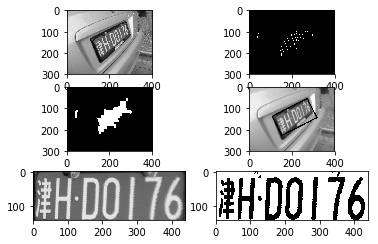

7
[8, 61, 139, 198, 274, 322, 378]


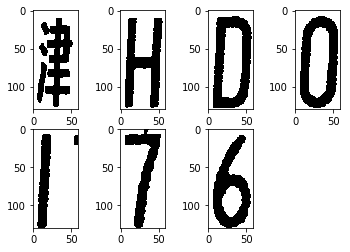

In [4]:
img = cv.imread('D:\\chepai.jpg', 0)

#gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
gaussian = cv.GaussianBlur(img, (5, 5), 0, 0, cv.BORDER_DEFAULT) 
median = cv.medianBlur(gaussian, 5)

sobel = cv.Sobel(median, cv.CV_8U, 1, 0,  ksize = 3)
ret,binary = cv.threshold(sobel, 170, 255, cv.THRESH_BINARY)

element1 = cv.getStructuringElement(cv.MORPH_RECT, (9, 1))
element2 = cv.getStructuringElement(cv.MORPH_RECT, (8, 6))
dilation = cv.dilate(binary, element2, iterations = 1)
erosion = cv.erode(dilation, element1, iterations = 1)
dilation2 = cv.dilate(erosion, element2,iterations = 3)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (21, 7))
close = cv.morphologyEx(dilation, cv.MORPH_CLOSE, kernel)

box = findPlateNumberRegion(close)
print(box)
cv.drawContours(median,[box],-1,(0,255,255),3) 

plt.subplot(321)
plt.imshow(img,cmap='gray')
plt.subplot(322)
plt.imshow(binary,cmap='gray')
plt.subplot(323)
plt.imshow(close,cmap='gray')
plt.subplot(324)
plt.imshow(median,cmap='gray')

newImg = trans(img)
plt.subplot(325)
plt.imshow(newImg,cmap='gray')
ret1,binary1 = cv.threshold(newImg, 170, 255, cv.THRESH_BINARY)

kernel = cv.getStructuringElement(cv.MORPH_RECT, (6, 2))
close = cv.morphologyEx(binary1, cv.MORPH_CLOSE, kernel)
ker = np.uint8(np.ones((3,3)))
dilate = cv.dilate(binary1, ker)
im = convert(dilate)
plt.subplot(326)
plt.imshow(im,cmap='gray')
plt.show()
plt.close()

flag = cut(im)
print(len(flag))
print(flag)
width = im.shape[1]
for i in range(7):
    plt.subplot(241 + i)
    plt.imshow(im[10:140,flag[i]-5:flag[i]-5 + 59], cmap='gray')
    cv.imwrite("D:\\num"+str(i)+".jpg",im[10:140,flag[i]-5:flag[i]-5 + 59])
    
plt.show()
plt.close()

cv.waitKey(0)
cv.destroyAllWindows()

In [2]:
def findPlateNumberRegion(close):
    _,contours, hierarchy = cv.findContours(close,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
    flag = 0
    maxarea = 0
    for i in range(len(contours)):
        region = []
        cnt=contours[i]
        area = cv.contourArea(cnt)
    #     rect = cv.minAreaRect(cnt)
    #     box= cv.boxPoints(rect)
        if(area >= maxarea):
            maxarea=area
            flag=i
        else:
            pass
    rect = cv.minAreaRect(contours[flag])
    box= cv.boxPoints(rect)
    box = np.int0(box)
    return box

def trans(img):
    pts1 = np.float32(box)
    pts2 = np.float32([[0,140],[0,0],[440,0],[440,140]])
    M = cv.getPerspectiveTransform(pts1, pts2)
    dst = cv.warpPerspective(img, M, (440, 140))
    
    pts1 = np.float32([[0,140],[10,10],[440,10],[420,80]])
    pts2 = np.float32([[0,140],[0,0],[440,0],[440,140]])
    M = cv.getPerspectiveTransform(pts1,pts2)
    dst1 = cv.warpPerspective(dst, M, (440,140))
    return dst1

def convert(img):
    temp = np.zeros(img.shape, np.uint8)
    col, row = img.shape[:2]
    for i in range(col):
        for j in range(row):
            temp[i,j] = 255 - img[i,j]
    return temp

def cut(img):
    height = img.shape[0]
    width = img.shape[1]
    white = []
    black = []
    for i in range(width):
        s = 0  # 这一列白色总数  
        t = 0  # 这一列黑色总数 
        for j in range(height):
            if img[j][i] == 255: 
                s += 1  
            if img[j][i] == 0:  
                t += 1
        white.append(s)
        black.append(t)
    flag=[]
    for i in range(width-1):
        #print(white[i], black[i], black[i + 1])
        if((white[i] > 130)&(black[i+1] > 10)):
            flag.append(i)
            #print(flag)
    return flag
